## Homework 1

## <em>Intro to Statistics</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br><br>
<span style="color:blue"> Problems are directly taken from MacKay Chapter 3 (http://www.inference.org.uk/itprnn/book.pdf). We recommend you to read Chapter 3 before starting HW1.  </span> <br>

***

### Imports

In [ ]:
import numpy as np
from scipy.integrate import quad, fixed_quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

***

#### Quick tutorial: Numerical Integration (using scipy's quad function)

##### Example - Harmonic Oscillator

The total energy of a harmonic oscillator is given by <br>
$$ E = \frac{1}{2}m \left(\frac{dx}{dt}\right)^2 + V(x) $$
Assuming that the potential $V(x)$ is symmetric about $x=0$ and the amplitude of the oscillator is $a$. Then the equation for the time period is given by <br>
$$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a) - V(x)}} $$

<span style="color:blue"> Q1. Suppose the potential is $V(x) = x^4$ and mass of the particle $m=1$. Then the below cell shows a function that calculates the period for a given amplitude. </span>



In [ ]:
def V(x):
    'Potential'
    return x**4

def timep(x, a):
    'Define the function that needs to be integrated (integrand) to calculate time period'
    return np.sqrt(8)*(V(a) - V(x))**-0.5

<span style="color:blue"> Q2. Let $a = 2$. Use inbuilt 'fixed_quad' (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.fixed_quad.html) function to calculate the time period for different values of 'N' (number of integration points). Calculate the error in the integral by estimating the difference for 'N' & '2N'. Approximately, at what 'N' is the absolute error less than $10^{-4}$ for 'a = 2'? </span>

<span style="color:blue"> Q3. Use inbuilt 'quad' (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) function that returns an error estimate and compare your answer for 'a = 2' (quad uses a more advanced integration technique) </span>

In [ ]:
# Using fixed_quad
a = 2

#N = 100
n = 100
tquadn = fixed_quad(timep, 0, a, args = (a, ), n = n)[0]
tquadn2 = fixed_quad(timep, 0, a, args = (a, ), n = 2*n)[0]
print('\nFor n = %d, the time period is %0.3f, with error = %0.3e'%(n, tquadn, abs(tquadn2 - tquadn)))
#N = 1000
n = 1000
tquadn = fixed_quad(timep, 0, a, args = (a, ), n = n)[0]
tquadn2 = fixed_quad(timep, 0, a, args = (a, ), n = 2*n)[0]
print('\nFor n = %d, the time period is %0.3f, with error = %0.3e'%(n, tquadn, abs(tquadn2 - tquadn)))
#N = 10000
n = 10000
tquadn = fixed_quad(timep, 0, a, args = (a, ), n = n)[0]
tquadn2 = fixed_quad(timep, 0, a, args = (a, ), n = 2*n)[0]
print('\nFor n = %d, the time period is %0.3f, with error = %0.3e'%(n, tquadn, abs(tquadn2 - tquadn)))

# Using quad
tquad = quad(timep, 0, a, args = (a, ))
print('\nInbuilt Gaussian Quadrature gives time period = ', tquad[0], ' with error = ', tquad[1])


For n = 100, the time period is 1.848, with error = 3.055e-03

For n = 1000, the time period is 1.853, with error = 3.076e-04

For n = 10000, the time period is 1.854, with error = 3.078e-05

Inbuilt Gaussian Quadrature gives time period =  1.8540746773017016  with error =  2.006794730391448e-10


***

#### Problem 1 - Inferring a Decay Constant

Unstable particles are emitted from a source and decay at a distance $x$, a real number that has an exponential probability distribution with characteristic length $\lambda$. Decay events can be observed only if they occur in a window extending from $x$ = 1cm to $x$ = 20cm. $N$ decays are observed at locations {$x_1$, ... , $x_N$}. What is $\lambda$? <br>
![alt text](https://drive.google.com/uc?id=1zlovMrjhFqW9Vz5dFoElWZpBFMWUp-Dq)

Given $\lambda$, the probability of observing a particle at a distance $x$ is:<br>

\begin{equation}
P(x\ |\ \lambda) =  
\begin{cases}
\frac{1}{\lambda}e^{-x/\lambda}\big/\ Z(\lambda)\ \ \ \ \ \ a < x < b \\
0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \mathrm{otherwise}
\end{cases}
\end{equation}

where
$$ Z(\lambda) = \int_a^b dx \frac{1}{\lambda}e^{-x/\lambda} = \big( e^{-a/\lambda} - e^{-b/\lambda} \big). $$
Here, $a = 1,\ b = 20$.
<br> <br>
<span style="color:blue"> 1. Write a function for $Z(\lambda)$. Then, use it to write another function for $P(x|\lambda)$. </span> <br>
<br>
Henceforth, we refer to $\lambda$ as $L$ (for the sake of simplicity).<br>
<br>
Check if your function can return a correct value if either $x$ or $L$ is a 2D array. Say $x$ is a scalar, and $L$ is a vector with $N$ elements. If you calculate the product $x*L$, the dimension of $x$ is stretched to $N \times 1$ in order to match that of $L$ ([broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)). If $x$ and $L$ are both vectors, then they must have the same dimensions to perform arithmetic operations on them ($x*L$, $x$+$L$, $x$/$L$, etc).

In [ ]:
def z_lambda(a,b,L):# L here is a one dimensional array
  return np.exp(-np.true_divide(a,L)) - np.exp(-np.true_divide(b,L))

def prob_xlambda(x,L,a,b):# x and L are two dimensional arrays
  answer = np.zeros((len(x),len(L)))
  for j in range(len(L)):
    for i in range(len(x)):
      if x[i]>a and x[i]<b:
        answer[i,j] =  np.true_divide(np.exp(-np.true_divide(x[i],L[j])),np.multiply(L[j],z_lambda(a,b,L[j])))
  return answer


<span style="color:blue"> <i> 2. Plot $P(x|\lambda)$ as a function of $x$ for $\lambda = 2, 5, 10$. Make sure to label each plot. </i></span>

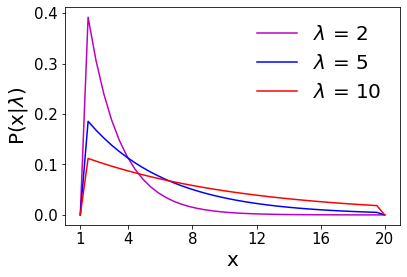

In [ ]:
# Create arrays for x and L.

# Plot the probability desity as a function of x for each lambda.
# Hint: You can use a for-loop and make a plot for each element of an array L. (But you don't
#have to do it in this way.)
# Hint2: You should label each plot. To do this in a for-loop, you should remember that you can
#insert values into a string with the placeholder % (https://docs.python.org/2.4/lib/typesseq-strings.html).

X = np.linspace(1,20,40,endpoint=True)
L= [2,5,10]

color = ['-m','-b','-r']
plt.figure()
for i in range(len(L)):
  plt.plot(X,prob_xlambda(X,[L[i]],1,20),color[i],label='$\lambda$ = ' + str(L[i]))
plt.legend(loc='best',fontsize=20,framealpha=0)
plt.xlabel('x',fontsize=20)
plt.ylabel('P(x|$\lambda$)',fontsize=20)
plt.xticks(ticks=[1,4,8,12,16,20],fontsize=15)
plt.yticks(ticks=[0,0.1,0.2,0.3,0.4],fontsize=15)
plt.show()


<span style="color:blue"> <i> 3. Plot $P(x|\lambda)$ as a function of $\lambda$ for $x = 3, 5, 12$. (This function is known as the <b>likelihood</b> of $\lambda$) Make sure to label each plot. Note that a peak emerges in each plot. </i></span>

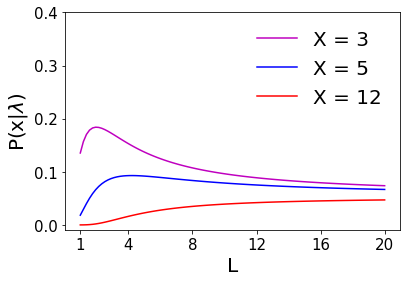

In [ ]:
# Create arrays for x and L.


# Plot the probability desity as a function of L for each x. Label each plot.

L = np.linspace(1,20,100,endpoint=True)
X= [3,5,12]

color = ['-m','-b','-r']
plt.figure()
for i in range(len(X)):
  plt.plot(L,*prob_xlambda([X[i]],L,1,20),color[i],label='X = ' + str(X[i]))
plt.legend(loc='best',fontsize=20,framealpha=0)
plt.xlabel('L',fontsize=20)
plt.ylabel('P(x|$\lambda$)',fontsize=20)
plt.xticks(ticks=[1,4,8,12,16,20],fontsize=15)
plt.yticks(ticks=[0,0.1,0.2,0.3,0.4],fontsize=15)
plt.show()


<span style="color:blue"> <i> 4. Plot $P(x|\lambda)$ as a function of $x$ and $\lambda$. Create a surface plot.  </i></span>

In [ ]:
# Import packages for making a 3D plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator


In [ ]:
# Hint/suggestion:
# Create arrays for x and L. These define your "x" and "y" coordinates.
x = np.linspace(1,20,100,endpoint=True)
L = np.linspace(1,20,100,endpoint=True)
# Create coordinate matrices from coordinate vectors.

coords = np.zeros((len(x),len(L)))

# Evaluate probability densities at all (x,y) coordinates. This is your "z" coordinate.

probs = prob_xlambda(x,L,1,20)

# Make plot
# Add contour plots
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(x, L, probs, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('L',fontsize=20)
ax.set_zlabel('P(x|$\lambda$)',fontsize=20)
# Customize the z axis
ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(6))
# A StrMethodFormatter is used automatically
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=1, aspect=5)

plt.show()


NameError: ignored

In the above figure, two contour plots (constant $x$ and $y$ slices) are also included. Compare them to the figures you created in part 2 and 3. They are the same; they correspond to vertical sections through surface.<br>

Now write Bayes' theorem:<br>

\begin{align}
P(\lambda\ |\ \{x_1, ..., x_N\}) & = \frac{P(\{x\}|\lambda)P(\lambda)}{P(\{x\})} \\
& \propto \frac{1}{(\lambda Z(\lambda))^N}\ \mathrm{exp} \big( -\sum_1^N x_n/\lambda \big) P(\lambda)
\end{align}
<br>
<span style="color:blue"> <i> 5. Define the likelihood function $P(\{x\}|\lambda)$ and plot $P(\{x \} = \{1.5, 2, 3, 4, 5, 12\}|\lambda)$ as a function of $\lambda$. Assuming a constant prior $P(\lambda)$, estimate the peak posterior value of $\lambda$ and the error on $\lambda$ by fitting to a gaussian at the peak.  </i></span>

The expression for likelihood function is given in part 1, its definition is:<br>

\begin{align}
P(x\ |\ \lambda) & = \frac{P(x\ ,\lambda)}{P(\lambda)}\\
\end{align}


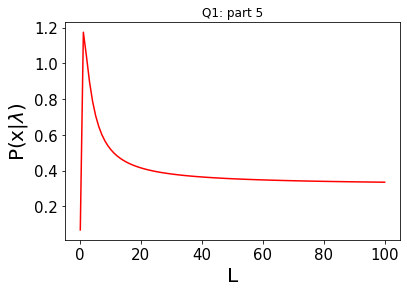

In [ ]:
# Create an array for L. Assume that it is evenly spaced numbers over the interval (1e-1, 1e2).
# Create an array for x.
L = np.linspace(1e-1,1e2,100)
x = [1.5,2,3,4,5,12]
# Evaluate the likelihood function and plot it as a function of L
likelihood = np.sum(prob_xlambda(x,L,1,20),axis=0)
plt.figure()
plt.plot(L,likelihood,'-r')
#plt.legend(loc=1,fontsize=16,framealpha=0, title_fontsize=20)
plt.xlabel('L',fontsize=20)
plt.ylabel('P(x|$\lambda$)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Q1: part 5')
plt.show()


# Make plot


In [ ]:
# How is the posterior related to the likelihood and the prior?
# Estimate the peak posterior value of L (Hint - https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html)
prior = 1/(1e2-1e-1)

ind = np.argmax(likelihood)
L_max = L[ind]
print('peak posterior value of L (L_max):')
print(L_max)
peak_post  = likelihood[ind]*prior
print('maximum posterior value is:')
print(peak_post)

peak posterior value of L (L_max):
1.1090909090909091
maximum posterior value is:
0.011749628701706467


Mean-Square Error
0.16684823452329398


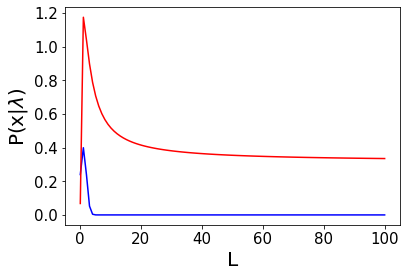

In [ ]:
# Estimate the error on L  by fitting to a gaussian at the peak
# Import packages for curve fitting
from scipy import stats
from sklearn.metrics import mean_squared_error

# Create an array of L near L_max

L = np.linspace(1e-1,1e2,100)

# Define Gaussian function with arbitrary amplitude (See https://en.wikipedia.org/wiki/Normal_distribution)
#gaussian = stats.norm.pdf(L_norm,loc=L_max,scale=1)
# Fit a Gaussian function to a data
#(https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)
# You can use different packages if you wish. This is only a suggestion.

print('Mean-Square Error')
print(mean_squared_error(stats.norm.pdf(L,loc= L_max,scale=1),likelihood))
# Plot both data and fit

plt.figure()
plt.plot(L,stats.norm.pdf(L,loc= L_max,scale=1),'-b')
plt.plot(L,likelihood,'-r')
#plt.legend(loc=1,fontsize=16,framealpha=0, title_fontsize=20)
plt.xlabel('L',fontsize=20)
plt.ylabel('P(x|$\lambda$)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


<span style="color:blue"> <i> 6. Let's say that it was previously believed that the characteristic length $\lambda$ were $3.5\pm2.0$. Modelling this prior $P(\lambda)$ belief with a Gaussian distribution, write a new function that returns the posterior function for this dataset (up to $\lambda$-independent normalization). Allow this function to take general mean and standard deviation of the prior in order to do the last part of this problem. Use this function to estimate the new peak posterior value of $\lambda$. </i></span>

In [ ]:
# Write a new posterior function for this dataset (up to lambda-independent normalization)
# This should take the mean and standard deviation of the prior as input.
prior = stats.norm.pdf(L,3.5,2)

postr1 = likelihood*prior

# Using the given prior belief, determine the maximum:
L_max = L[np.argmax(postr1)]
print('peak posterior value of L/L_max:')
print(L_max)

peak_postr = max(postr1)
print('new maximum posterior value is:')
print(peak_postr)

peak posterior value of L/L_max:
3.1272727272727274
new maximum posterior value is:
0.17575186749396907


<span style="color:blue"> <i> 7. Determine the limiting behavior of this new peak posterior value as the uncertainty on the prior belief goes to zero and as it goes to infinity by evaluating this peak posterior value for uncertainties of 1e-3 and 1e3. </i></span>

In [ ]:
# Determine maximum posterior value of lambda for uncertainty of 1e-3
prior = stats.norm.pdf(L,3.5,1e-3)
postr2 = likelihood*prior
L_max = L[np.argmax(postr2)]
print('peak posterior value of L for uncertainity of 1e-3 is:')
print(L_max)

# Using the given prior belief, determine the maximum:

peak_postr2 = max(postr2)
print('new maximum posterior value is:')
print(peak_postr2)

# Determine maximum posterior value of lambda for uncertainty of 1e3
prior = stats.norm.pdf(L,3.5,1e3)

postr3 = likelihood*prior
L_max = L[np.argmax(postr3)]
print('peak posterior value of L for uncertainity of 1e3 is:')
print(L_max)

# Using the given prior belief, determine the maximum:
peak_postr3 = max(postr3)
print('new maximum posterior value is:')
print(peak_postr3)

peak posterior value of L for uncertainity of 1e-3 is:
0.1
new maximum posterior value is:
0.0
peak posterior value of L for uncertainity of 1e3 is:
1.1090909090909091
new maximum posterior value is:
0.0004682722860174807


<span style="color:blue"> <i> 8. Why should we expect these values?
   </i></span>

<span style="color:blue"> <i> <b>Answer: For very high uncertainity of 1e3, the gaussian prior essentially becomes equivalent to the uniform prior case of part 5 and hence the peak posterior value of L is also same. For the case of  very low uncertainity of 1e-3, P($\lambda$) is zero except at 3.5 thus it is no surprise posterior is maximum at lowest value of x = 0.1, since posterior is  directly proportional to $e^{-x/\lambda}$</b> </i></span><br>.

***

#### Problem 2 - Biased Coin

When spun on edge 256 times, a Belgian one-euro coin came up heads 142 times and tails 114. Do these data give evidence that the coin is biased rather than fair?  <br>
<br>
We compare the models $\mathcal{H}_0$ - the coin is fair - and $\mathcal{H}_1$ - the coin is biased. <br>
<br>
First, suppose that the model $\mathcal{H}_1$ assumes a uniform prior distribution for $p$ (the probability of getting heads in a single toss): $P(p|\mathcal{H}_1) = 1$. <br>
<br>
Let the data $D$ be a sequence which contains counts of the two possible outcomes (H - head / T - tail): e.g. HHTHT, HHHTTHTT, etc. <br>
<br>
Given a particular $p$, the probability that $F$ tosses results in a sequence $D$ of $F_H$ heads and $F_T$ tails is:
$$ P(D|p,\mathcal{H}_1) = p^{F_H} (1-p)^{F_T}. $$
<br>
Then,
$$ P(D|\mathcal{H}_1) = \int_0^1 dp\ p^{F_H} (1-p)^{F_T} = \frac{\Gamma(F_H+1)\Gamma(F_T+1)}{\Gamma(F_H+F_T+2)} .$$
Note that the above integral is a "Beta function" $B(F_H+1, F_T+1)$ and can be written in terms of the gamma function. (See http://www.math.uah.edu/stat/special/Beta.html) <br>
<br>
The gamma function is an extension of the factorial function $\Gamma(n+1) = n!$ <br> <br>
$$ \frac{\Gamma(F_H+1)\Gamma(F_T+1)}{\Gamma(F_H+F_T+2)} = \frac{F_H! F_T!}{(F_H+F_T+1)!} $$
<br>
Similarly,
$$ P(D|\mathcal{H}_0) = \big(\frac{1}{2}\big)^F. $$
<br>
<span style="color:blue"> <i> 1. Find the likelihood ratio $\frac{P(D|\mathcal{H}_1)}{P(D|\mathcal{H}_0)}$, assuming the uniform prior of $\mathcal{H}_1$. Which model does the data favor?</i></span> <br>
<br>
(Hint: If the argument of the gamma function is large, math.gamma() overflows. You can prevent this by using the fact:
$$ log(xy/z) = log(x)+log(y)-log(z) $$ <br>
Then, you can evaluate $P = \Gamma(x)*\Gamma(y)/\Gamma(z)$ in the following way:
$$ Q = log(P) = log(\Gamma(x))+log(\Gamma(y))-log(\Gamma(z)) $$
$$ P = e^Q $$
<br>
You can easily evaluate logarithm of the gamma function using "lgamma" (from math import lgamma) see https://docs.python.org/2/library/math.html)<br>
<br>
(Hint2: For reference, you can read: https://en.wikipedia.org/wiki/Bayes_factor)

In [ ]:
import math
Fh = 142
Ft = 114
prob_dho = pow(0.5,Fh+Ft)
prob_dh1 = pow(math.e,(math.lgamma(Fh+1) + math.lgamma(Ft+1) - math.lgamma(Ft + Fh+2)))

print(prob_dh1/prob_dho)

0.36008921351868456


**Answer : Under the  assumption of uniform prior for $H_1$ the Bayes factor comes out in the favor of unbiased case $H_o$.**

Instead of assuming a uniform prior, suppose that we add a small bias, and consequently the prior were presciently set: <br>
$$ P(p|\mathcal{H}_1, \alpha) = \frac{1}{Z(\alpha)}p^{\alpha-1}(1-p)^{\alpha-1},\ \  \mathrm{where}\ \ Z(\alpha) = \Gamma(\alpha)^2/\Gamma(2\alpha) $$
<br>
<span style="color:blue"> <i> 2. Calculate the likelihood ratio $\frac{P(D|\mathcal{H}_1)}{P(D|\mathcal{H}_0)}$, assuming the above prior of $\mathcal{H}_1$. Let $\alpha$ = \{ .37, 1.0, 2.7, 7.4, 20, 55, 148, 403, 1096 \}. </i></span><br>


<span style="color:blue"> <i> Answer: write down the analytic expression of $\frac{P(D|\mathcal{H}_1)}{P(D|\mathcal{H}_0)}$. Show your work here. </i></span>

$$ P(D|\mathcal{H}_1) = \int_0^1 dp\ \frac{1}{Z(\alpha)}p^{\alpha-1}(1-p)^{\alpha-1} p^{F_H} (1-p)^{F_T} = \frac{1}{Z(\alpha)}\int_0^1 dp\ p^{F_H + \alpha-1} (1-p)^{F_T + \alpha-1} = \frac{\Gamma(F_H+\alpha)\Gamma(F_T+α)\Gamma(2\alpha)}{\Gamma(F_H+F_T+2\alpha)\Gamma(\alpha)^2} $$

likelihood ratio for α = 0.37 is 0.18681218637426353
likelihood ratio for α = 1.0 is 0.36008921351868456
likelihood ratio for α = 2.7 is 0.6208731870947544
likelihood ratio for α = 7.4 is 0.9863028469036422
likelihood ratio for α = 20.0 is 1.3835685733196785
likelihood ratio for α = 55.0 is 1.603774022136429
likelihood ratio for α = 148.0 is 1.4914569982063226
likelihood ratio for α = 403.0 is 1.2605120911887078
likelihood ratio for α = 1096.0 is 1.1106653175603924


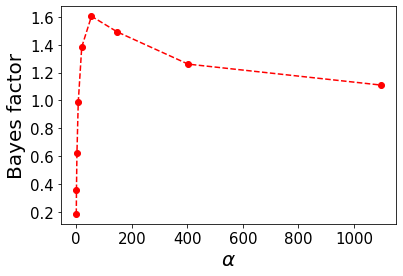

In [ ]:
def bayes_factor(Fh,Ft,alpha):
  prob_dho = pow(0.5,Fh+Ft)
  prob_dh1 = pow(math.e,(math.lgamma(Fh+alpha) + math.lgamma(Ft+alpha) - math.lgamma(Ft + Fh + 2*alpha) + math.lgamma(2*alpha)- 2*math.lgamma(alpha)))
  return prob_dh1/prob_dho

alphas = np.array([0.37, 1.0, 2.7, 7.4, 20, 55, 148, 403, 1096])

factors= np.zeros(len(alphas))
for i in range(len(alphas)):
  factors[i] = bayes_factor(142,114,alphas[i])
  print('likelihood ratio for \u03B1 = ' + str(alphas[i]) + ' is ' + str(factors[i]))

plt.figure()
plt.plot(alphas,factors,'--or')
plt.xlabel('$\\alpha$',fontsize=20)
plt.ylabel('Bayes factor',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()



<span style="color:blue"> <i> 3. Does the likelihood ratio for $\mathcal{H}_1$ over $\mathcal{H}_0$ increases as $\alpha$ increases? </i></span><br>

<span style="color:blue"> <i><b>Answer: No, the likelihood ratio shows a
non-monotonic dependence on $\alpha$ with a peak around 55.</b></i></span><br>


<span style="color:blue"> <i> 4. Now, let $\mathcal{H}_1$ be the model in which the probability of getting heads is descrete at 142/256. What is the likelihood in this case? </i></span><br>

In [ ]:
import math

def comb(n,k):
  return math.factorial(n)/(math.factorial(k)*math.factorial(n-k))

ph_h1 = 142/256
prob = pow(ph_h1,Fh)*pow(1-ph_h1,Ft)*comb(256,142)
print(prob)

0.05011901063555848


<span style="color:blue"> <i> 5. Explain the above result. </i></span><br>

<span style="color:blue"> <i> Answer: **For the number of coin flips as high as 256 the total number of possible combinations are also very high. Thus getting a very low likelihood for any one given combination is expected**</i></span><br>


<span style="color:blue"> <i> 6. Now let us test the null hypothesis. Assuming the central limit theorem, we model the binomial as a gaussian centered at $\mu = F/2$ and with the width given by $\sigma^2 = F*(p_{heads})*(p_{tails})$. (in this case, $p_{heads} = p_{heads} = 1/2$) </i></span><br>

In [ ]:
# the gaussian is given by

def gaussian(x):
  avg = 128
  var= 64
  return 1/(math.sqrt(2*math.pi*var))*math.exp(-0.5*pow((x-avg),2)/var)

p_value = quad(gaussian,142, np.inf)

print(p_value)

(0.040059156863817044, 8.761680770801385e-11)


For the critical value of alpha = 0.05, the calculated p value indicates that null hypothesis should be rejected or is less likely.

#### Problem 3 - Monty Hall

On a game show, a contestant is told the rules as follows: <br>
<br>
There are three doors, labelled 1, 2, 3. A single prize has been hidden behind one of them. You get to select one door. Initially your chosen door will not be opened. Instead, the gameshow host will open one of the other two doors, and he will do so in such a way as not to reveal the prize. For example, if you first choose door 1, he will then open one of doors 2 and 3, and it is guaranteed that he will choose which one to open so that the prize will not be revealed.<br>
<br>
At this point, you will be given a fresh choice of door: you can either stick with your first choice, or you can switch to the other closed door. All the doors will then be opened and you will receive whatever is behind your final choice of door.<br>
<br>
Imagine that the contestant chooses door 1 first; then the gameshow host opens door 2, revealing nothing behind the door, as promised. Should the contestant (a) stick with door 1, or (b) switch to door 3, or (c) does it make no difference?

Let $\mathcal{H}_i$ denote the hypothesis that the prize is behind door $i$. We make the following assumptions: the three hypotheses $\mathcal{H}_1, \mathcal{H}_2, \mathcal{H}_3$ are equiprobable a <i>priori</i>, i.e., <br>
<br>
$$ P(\mathcal{H}_1) = P(\mathcal{H}_2) = P(\mathcal{H}_3) = \frac{1}{3} $$
<br>
The datum we receive, after choosing door 1, is one of $D$ = 3 and $D$ = 2 (meaning door 3 or 2 is opened, respectively).<br>
<span style="color:blue"> <i> 1. Find $P(D=2|\mathcal{H}_1), P(D=3|\mathcal{H}_1), P(D=2|\mathcal{H}_2), P(D=3|\mathcal{H}_2), P(D=2|\mathcal{H}_3), P(D=3|\mathcal{H}_3)$. </i></span><br>

<span style="color:blue"> <i> Answer: For the case where the contestant has first chosen gate 1

$ P(D = 2 | \mathcal{H}_1) = 0.5$ , since the prize is in door 1, the host is equally free to open gate 2 or 3

$ P(D = 3 | \mathcal{H}_1) = 0.5$ , since the prize is in door 1, the host is equally free to open gate 2 or 3

$ P(D = 2 | \mathcal{H}_2) = 0$ , since the prize is in door 2, the host's only remaining option is door 3. they cannot open door 2

$ P(D = 3 | \mathcal{H}_2) = 1$ , since the prize is in door 2, the host's only option is to open door 3

$ P(D = 2 | \mathcal{H}_3) = 1$ , since the prize is in door 3, the host's only option is door 2

$ P(D = 3 | \mathcal{H}_3) = 0$ , since the prize is in door 3, the host is allowed to open door 2. door 3 has to remain closed


 </i></span><br>

---




Now, using Bayes’ theorem, we evaluate the posterior probabilities of the hypotheses:<br>
$$ P(\mathcal{H}_i|D=2) = \frac{P(D=2|\mathcal{H}_i)P(\mathcal{H}_i)}{P(D=2)} $$ <br>
<br>
<span style="color:blue"> <i> 2. First, we need to calculate the normalizing constant (denominator). Find $P(D=2), P(D=3)$ </i></span><br>

<span style="color:blue"> <i> Answer: The expression for P(D) is: </i></span><br>

$$ P(D) = \sum_i P(D| \mathcal{H}_i)P(\mathcal{H}_i)$$
$$ P(D=2) = \frac{1}{3}(0.5+0+1) = 0.5$$
$$ P(D=3) = \frac{1}{3}(0.5+1+0) = 0.5$$

<span style="color:blue"> <i> 3. Evaluate the posterior probability and argue if the contestant should switch to door 3. <br>
<br>Alternatively, you can perform a thought experiment in which the game is played with 100 doors. The rules are now that the contestant chooses one door, then the game show host opens 98 doors in such a way as not to reveal the prize, leaving the contestant’s selected door and one other door closed. The contestant may now stick or switch. Where do you think the prize is? </i></span><br>

<span style="color:blue"> <i><b> Answer:
$ P(\mathcal{H}_1|D=2) = 1/3$ \\
$ P(\mathcal{H}_1|D=3) = 1/3$ \\
$ P(\mathcal{H}_2|D=2) = 0$ \\
$ P(\mathcal{H}_2|D=3) = 2/3$ \\
$ P(\mathcal{H}_3|D=2) = 2/3$ \\
$ P(\mathcal{H}_3|D=3) = 0$ \\

the probability that gate 2 is  opened and prize lies in 3 is 2/3, whereas the probability of prize  lying in  1 is 1/3. Considering this posterior probabilities contestant should switch to door 3.</b></i></span><br>

***
Imagine that the game happens again and just as the gameshow host is about to open one of the doors a violent earthquake rattles the building and one of the three doors flies open. It happens to be door 3, and it happens not to have the prize behind it. The contestant had initially chosen door 1.<br><br>
Repositioning his toupee, the host suggests, ‘OK, since you chose door 1 initially, door 3 is a valid door for me to open, according to the rules of the game; I’ll let door 3 stay open. Let’s carry on as if nothing happened.’
Should the contestant stick with door 1, or switch to door 2, or does it make no difference? Assume that the prize was placed randomly, that the gameshow host does not know where it is, and that the door flew open because its latch was broken by the earthquake.<br><br>

[A similar alternative scenario is a gameshow whose confused host forgets the rules, and where the prize is, and opens one of the unchosen doors at random. He opens door 3, and the prize is not revealed. Should the contestant choose what’s behind door 1 or door 2? Does the optimal decision for the contestant depend on the contestant’s beliefs about whether the gameshow host is confused or not?]

***
If door 3 is opened by an earthquake, the inference comes out differently – even though visually the scene looks the same. The nature of the data, and the probability of the data, are both now different. The possible data outcomes are, firstly, that any number of the doors might have opened. We could label the eight possible outcomes <b>d</b> = (0,0,0),(0,0,1),(0,1,0),(1,0,0),(0,1,1),...,(1,1,1). <br><br>
Secondly, it might be that the prize is visible after the earthquake has opened one or more doors. So the data $D$ consists of the value of <b>d</b>, and a statement of whether the prize was revealed. It is hard to say what the probabilities of these outcomes are, since they depend on our beliefs about the reliability of the door latches and the properties of earthquakes, but it is possible to extract the desired posterior probability without naming the values of $P($<b>d</b>$|\mathcal{H}_i)$ for each <b>d</b>. <br><br>
All that matters are the relative values of the quantities $P(D|\mathcal{H}_1)$, $P(D|\mathcal{H}_2)$, $P(D|\mathcal{H}_3)$, for the value of $D$ that actually occurred. The value of $D$ that actually occurred is ‘<b>d</b> = (0, 0, 1), and no prize visible’.

<span style="color:blue"> <i> 4. How does $P(D|\mathcal{H}_1)$ compare with $P(D|\mathcal{H}_2)$? What is $P(D|\mathcal{H}_3)$? Find $P(D|\mathcal{H}_1)/P(D)$ and $P(D|\mathcal{H}_2)/P(D)$. </i></span><br>

<span style="color:blue"> <i> <b>Answer:

1. Whether the prize is inside door 1 or door 2 does not affect the outcome/data D so $P(D | \mathcal{H}_1) = P(D | \mathcal{H}_2)$.  

2. $P(D | \mathcal{H}_3) = 0$ since if the prize is inside third door, the data D cannot be obtained.

Also,
$$ P(D) = \sum_i P(D | \mathcal{H}_i)P(\mathcal{H}_i)$$

# Using $P(\mathcal{H}_i) = 1/3 $ and the above statements 1 and 2

$$ P(D|\mathcal{H}_1)/P(D) = P(D|\mathcal{H}_2)/P(D) = 1.5$$
</b></i></span><br>



<span style="color:blue"> <i>  5. Evaluate the posterior probability and argue if the contestant should switch. </i></span><br>

<span style="color:blue"> <i><b> Answer:
Expression for posterior probabilities
$$ P(\mathcal{H}_i|D) = \frac{P(D|\mathcal{H}_i)P(\mathcal{H}_i)}{P(D)} $$
Using  this
$ P( \mathcal{H}_1 | D) = 0.5 $ and $ P( \mathcal{H}_2 | D) = 0.5 $

So the posteriors in the two cases are equal so it doesnt matter if the contestant chooses to switch or not
 </b></i></span><br>


***